In [1]:
from ga4stpg.util import STEIN_B
from ga4stpg.graph import ReaderORLibrary, UGraph
from ga4stpg.graph.util import is_steiner_tree
from ga4stpg.tree.evaluation import EvaluateTreeGraph
from ga4stpg.tree.generate import GenerateBasedRandomWalk, GenerateBasedPrimRST

In [2]:
STEIN_B

[('steinb1.txt', 82),
 ('steinb2.txt', 83),
 ('steinb3.txt', 138),
 ('steinb4.txt', 59),
 ('steinb5.txt', 61),
 ('steinb6.txt', 122),
 ('steinb7.txt', 111),
 ('steinb8.txt', 104),
 ('steinb9.txt', 220),
 ('steinb10.txt', 86),
 ('steinb11.txt', 88),
 ('steinb12.txt', 174),
 ('steinb13.txt', 165),
 ('steinb14.txt', 235),
 ('steinb15.txt', 318),
 ('steinb16.txt', 127),
 ('steinb17.txt', 131),
 ('steinb18.txt', 218)]

In [3]:
import seaborn as sns
from matplotlib import pyplot as plt 

from collections import Counter
from statistics import mean, stdev
from os import path

In [4]:
import config

In [5]:
INDEX = 15
filename = STEIN_B[INDEX][0]

print(filename)

filename = path.join(config.dataset_directory, filename)
stpg = ReaderORLibrary().parser(filename)

steinb16.txt


In [6]:
print("STPG information", '\n', 10*'- ')
print('Instance: ', stpg.name)
print('Best Known cost: ', STEIN_B[INDEX][1])
print("Nro. Node:", stpg.nro_nodes)
print("Nro. Edges:", stpg.nro_edges)
print("Nro. Terminals:", stpg.nro_terminals)
print("Terminals: \n", stpg.terminals)

STPG information 
 - - - - - - - - - - 
Instance:  B16
Best Known cost:  127
Nro. Node: 100
Nro. Edges: 200
Nro. Terminals: 17
Terminals: 
 {97, 37, 69, 72, 9, 76, 60, 81, 82, 17, 20, 21, 54, 87, 25, 59, 28}


In [7]:
initializer = GenerateBasedRandomWalk(stpg)
evaluator = EvaluateTreeGraph(stpg)

In [8]:
%%time
population = [initializer() for _ in range(100)]

Wall time: 782 ms


In [9]:
result = [evaluator(tree) for tree in population]
cost = [item[0] for item in result]
qtd_partition = [item[1] for item in result]

mean_cost = mean(cost)
stdev_cost = stdev(cost)

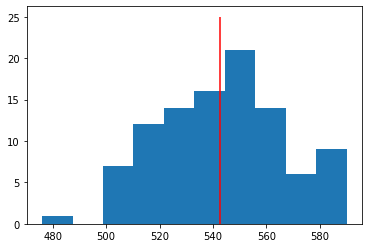

In [10]:
plt.hist(cost, bins=10)
plt.vlines(mean_cost, 0, 25, colors='red')

In [11]:
print("Nro Partitions")
print("Mean: ", mean(qtd_partition))
print("Std Dev: ", stdev(qtd_partition))

Nro Partitions
Mean:  1
Std Dev:  0.0


In [12]:
edges = Counter([(min(v,u), max(v,u)) 
                    for tree in population
                        for v, u in tree.gen_undirect_edges()])

In [13]:
help(edges)

Help on Counter in module collections object:

class Counter(builtins.dict)
 |  Counter(*args, **kwds)
 |  
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          

In [14]:

data = edges.most_common(150)

ticks = [f"{item[0][0]}.{item[0][1]}"for item in data]
y_value = [item[1] for item in data]

y_mean = mean(y_value)
y_stdev = stdev(y_value)

print(len(edges), len(y_value))

data[:10]

200 150


[((33, 59), 100),
 ((62, 100), 91),
 ((32, 42), 82),
 ((31, 70), 78),
 ((49, 84), 78),
 ((76, 92), 76),
 ((10, 43), 74),
 ((12, 17), 74),
 ((68, 73), 74),
 ((68, 81), 71)]

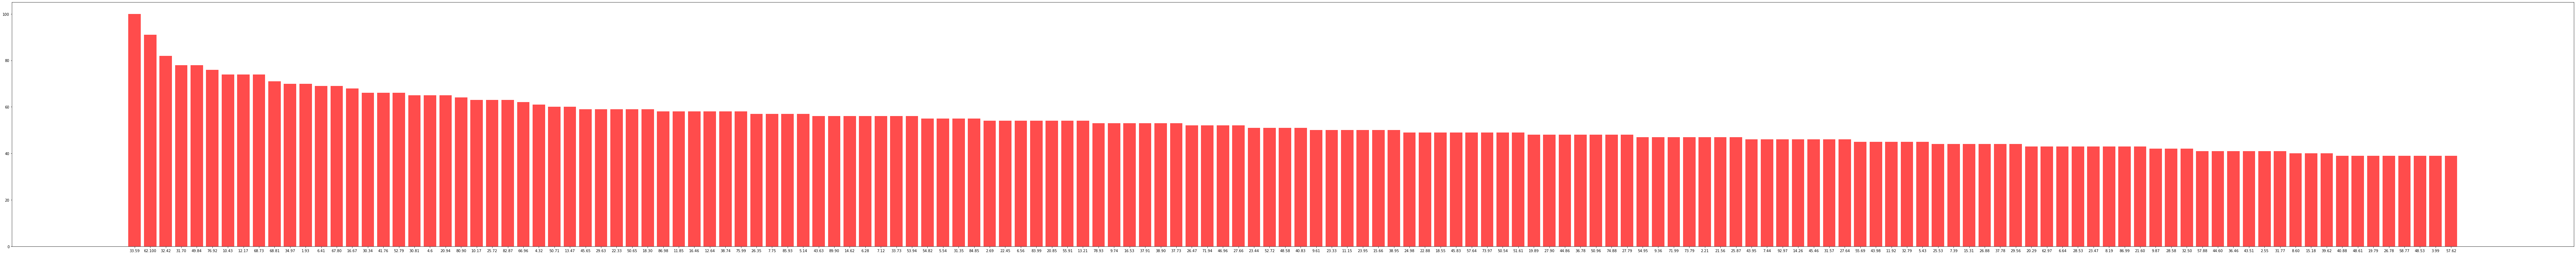

In [15]:
plt.figure(figsize=(100,10))
plt.bar(ticks, y_value, color='red', alpha=0.7)

plt.tight_layout()

In [16]:
print("Mean of edge apperance: ", y_mean)
print("St Dev: ", y_stdev)

Mean of edge apperance:  52.93333333333333
St Dev:  10.74329300163668


In [17]:
initilizator = GenerateBasedPrimRST(stpg)

In [18]:
%%time
population = [ initilizator() for _ in range(100)]

Wall time: 298 ms


In [19]:
result2 = [evaluator(tree) for tree in population]
cost2 = [item[0] for item in result2]
qtd_partitions2 = [item[1] for item in result2]

In [20]:
mean_cost2 = mean(cost2)

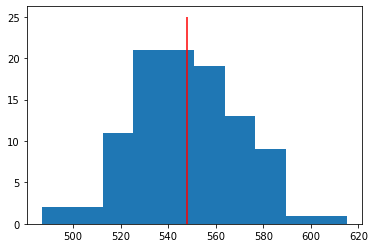

In [21]:
plt.hist(cost2, bins=10)
plt.vlines(mean_cost2, 0, 25, colors='red')

In [22]:
edges2 = Counter([(min(v,u), max(v,u)) 
                    for tree in population
                        for v, u in tree.gen_undirect_edges()])

200 150


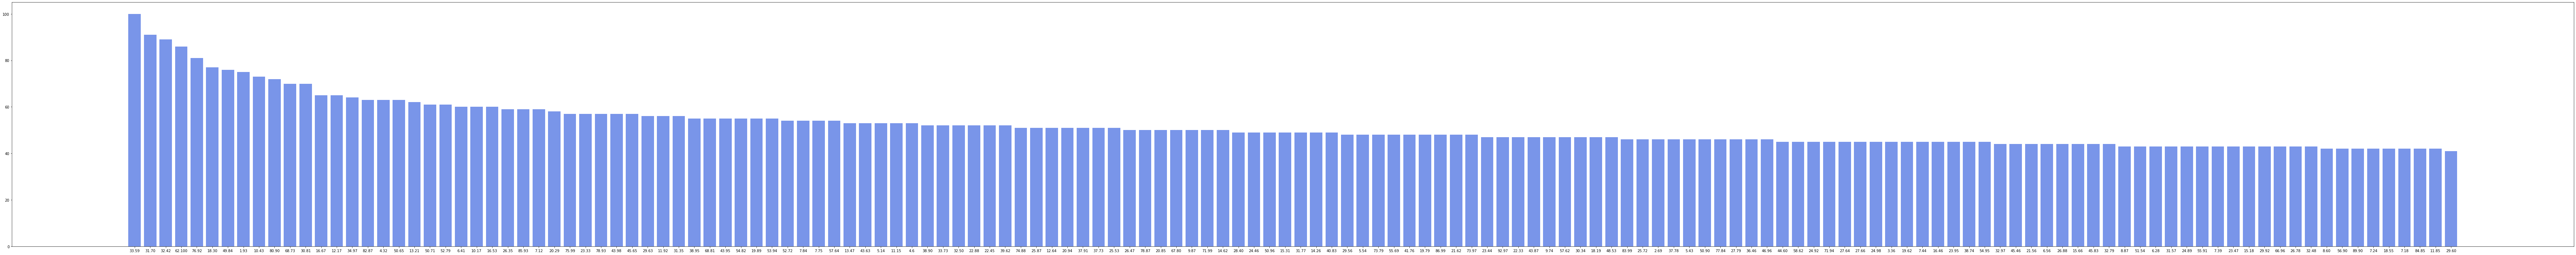

In [23]:
data = edges2.most_common(150)

ticks2 = [f"{item[0][0]}.{item[0][1]}"for item in data]
y_value2 = [item[1] for item in data]

y_mean = mean(y_value2)
y_stdev = stdev(y_value2)

print(len(edges2), len(y_value))

plt.figure(figsize=(100,10))
plt.bar(ticks2, y_value2, color='royalblue', alpha=0.7)
# plt.bar(ticks2, y_value, color='red', alpha=0.7)

plt.tight_layout()

200 150


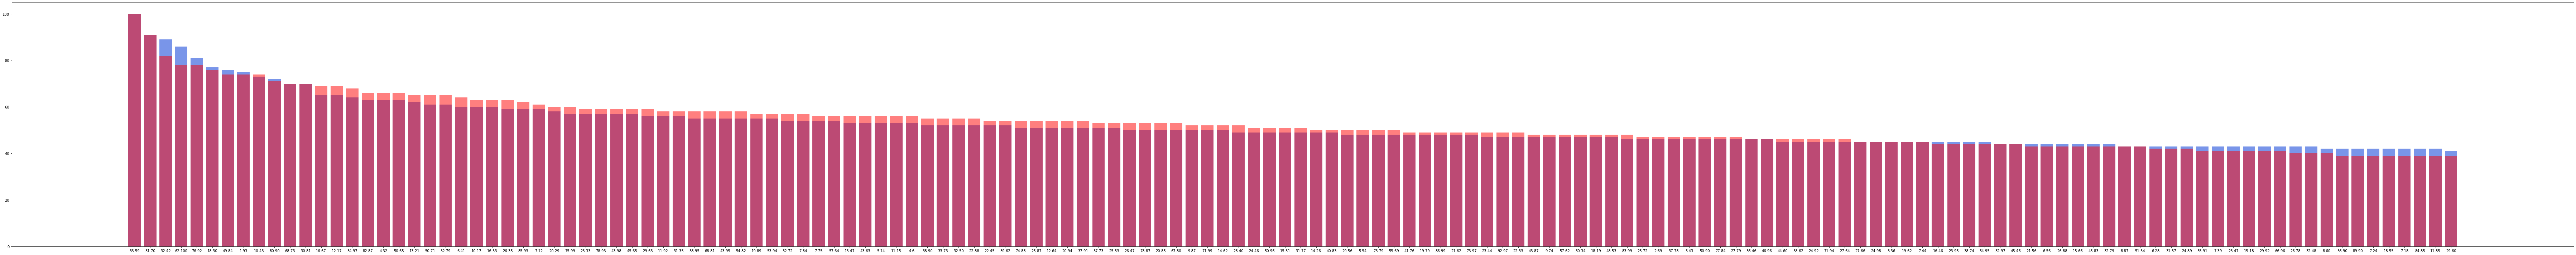

In [24]:
data = edges2.most_common(150)

ticks2 = [f"{item[0][0]}.{item[0][1]}"for item in data]
y_value2 = [item[1] for item in data]

y_mean = mean(y_value2)
y_stdev = stdev(y_value2)

print(len(edges2), len(y_value))

plt.figure(figsize=(100,10))
plt.bar(ticks2, y_value2, color='royalblue', alpha=0.7)
plt.bar(ticks2, y_value, color='red', alpha=0.5)

plt.tight_layout()